In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np

import seaborn as sns
from scipy.spatial import ConvexHull

import matplotlib.pyplot as plt
import matplotlib.colors as colors
%matplotlib inline
%config InlineBackend.figure_format = 'svg'


In [2]:
#read dataset as df
df1_b = pd.read_csv('./MT_Data/numerical_continuation_activeset _fullzone.csv')
df2_b = pd.read_csv('./MT_Data/numerical_continuation_sqp_fullzone.csv')
df1_o = df1_b.loc[:,['zeta','omega_ratio']]
df2_o = df2_b.loc[:,['zeta','omega_ratio']]


In [3]:
merged = pd.merge(df1_o, df2_o, how='outer', indicator=True)
diff1 = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1)
df1 = diff1
df1 = df1.dropna(axis=0,how='all')  
df1.to_csv('./MT_Data/NodesOnlyinActiveSet.csv', index='False')
#print(df1)

merged = pd.merge(df2_o, df1_o, how='outer', indicator=True)
diff2 = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1) 
df2 = diff2
df2.to_csv('./MT_Data/NodesOnlyinSQP.csv', index='False')
#print(df2)

merged = pd.merge(df2_o, df2, how='outer', indicator=True)
diff3 = merged[merged['_merge'] == 'left_only'].drop('_merge', axis=1) 
df3 = diff3
df3.to_csv('./MT_Data/NodesIntersection.csv', index='False')
#print(df3)

In [4]:
#get valid data from the dataset
zeta_Intersection = np.array(df3.zeta)
omega_ratio_Intersection = np.array(df3.omega_ratio)

zeta_Active = np.array(df1.zeta)
omega_ratio_Active = np.array(df1.omega_ratio)

zeta_SQP = np.array(df2.zeta)
omega_ratio_SQP = np.array(df2.omega_ratio)

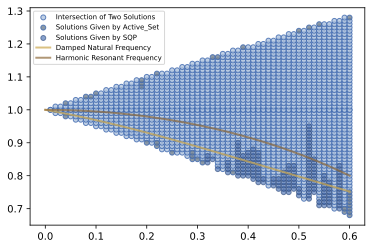

In [5]:
standard_zeta = np.linspace(0, 0.6, 1000)
standard_omega = np.pi/((4-np.pi) * standard_zeta+ np.pi*np.sqrt(1 + standard_zeta*standard_zeta))
harmonic_omega = np.sqrt(1 - standard_zeta*standard_zeta)
standard_im ,= plt.plot(standard_zeta,standard_omega,c= "#cba74e",alpha=0.7, linewidth=2,linestyle = '-')
harmonic_im ,= plt.plot(standard_zeta,harmonic_omega,c= "#8f6c3c",alpha=0.7, linewidth=2,linestyle = '-')

Intersection_im = plt.scatter(zeta_Intersection, omega_ratio_Intersection, c="lightsteelblue",edgecolor = "#3b65ac", alpha=0.8, marker = '.',s = 100)
Active_im = plt.scatter(zeta_Active,omega_ratio_Active, c="slategray" ,edgecolor = "#3b65ac", alpha=0.8, marker = '.',s = 100)
SQP_im = plt.scatter(zeta_SQP,omega_ratio_SQP, c="#3b65ac" ,edgecolor = "#234175", alpha=0.6, marker = '.',s = 100)
plt.legend(handles=[Intersection_im, Active_im,SQP_im,standard_im,harmonic_im ], labels=['Intersection of Two Solutions','Solutions Given by Active_Set','Solutions Given by SQP','Damped Natural Frequency','Harmonic Resonant Frequency'], loc='upper left',fontsize = 'x-small')
plt.savefig('mapping_zone_compare_fullzone.svg',format='svg',dpi=600)
plt.show()